In [21]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial import distance
from sklearn import metrics
from sklearn.datasets import make_blobs

#### Example 1

In [22]:
iris = datasets.load_iris()
X = iris.data

In [23]:
dbscan = DBSCAN(eps=1,min_samples=4)

In [24]:
dbscan.fit(X)

DBSCAN(eps=1, min_samples=4)

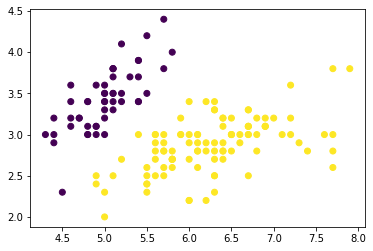

In [25]:
plt.scatter(iris.data[:,0] , iris.data[:,1] , c = dbscan.labels_);

#### Example 2

In [26]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4)

In [27]:
# Compute similarities
D = distance.squareform(distance.pdist(X))
S = 1 - (D / np.max(D))

In [28]:
db = DBSCAN( min_samples=10)

In [29]:
db=db.fit(S)

In [30]:
core_samples = db.core_sample_indices_


In [31]:
labels = db.labels_

In [32]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print( 'Estimated number of clusters: %d' % n_clusters_)
print ("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels) )
print ("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels) )
print ("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels) )
print ("Adjusted Rand Index: %0.3f" %  metrics.adjusted_rand_score(labels_true, labels) )
print ("Adjusted Mutual Information: %0.3f" %  metrics.adjusted_mutual_info_score(labels_true, labels) )
print ("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(D, labels, metric='precomputed'))


Estimated number of clusters: 6
Homogeneity: 0.590
Completeness: 0.442
V-measure: 0.506
Adjusted Rand Index: 0.321
Adjusted Mutual Information: 0.502
Silhouette Coefficient: -0.091


In [33]:
import pylab as pl
from itertools import cycle

Text(0.5, 1.0, 'Estimated number of clusters: 6')

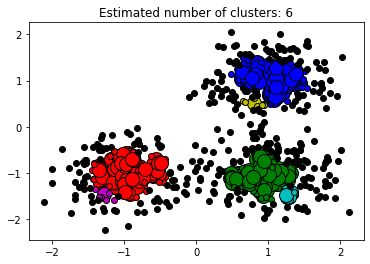

In [34]:
# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
for k, col in zip(set(labels), colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    for index in class_members:
        x = X[index]
        if index in core_samples and k != -1:
            markersize = 14
        else:
            markersize = 6
        pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=markersize)

pl.title('Estimated number of clusters: %d' % n_clusters_)